###Questions & Answers

1:Now do some exploratory data analysis to figureout which variables have direct and clear impact on employee
retention(i.e whether they leave the company or continue to work)

2::plot bar chats showing impact of employee salaries on retention

3:plot bar chats showing corelation between department and employee retention

4:Now buld logistic regression model using varibales that were narrowed down in step 1

5:Measure the accuracy of Model


### import libraries

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

### Loading The Data
+ Look at some information about data & the columns
+ fix any missing or incorrect values
+ maximum satisfaction_level
+ maximum / minimum number of projects

In [5]:
df = pd.read_csv("../../datasets/retention.csv")

In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Preparation and Cleaning

In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [14]:
len(df.columns)

10

In [16]:
len(df)

14999

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
##lets see statistic of the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [26]:
#finding missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dtype: int64

In [25]:
# finding numeric columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

8

In [38]:
#checking all data in ascending order values
df.sum().sort_values(ascending=False)

average_montly_hours     3015554.00
number_project             57042.00
time_spend_company         52470.00
last_evaluation            10740.81
satisfaction_level          9191.89
left                        3571.00
Work_accident               2169.00
promotion_last_5years        319.00
dtype: float64

In [41]:
#lets check missing percentages 
missing_percentages = df.sum().sort_values(ascending=False)/len(df)
missing_percentages

average_montly_hours     201.050337
number_project             3.803054
time_spend_company         3.498233
last_evaluation            0.716102
satisfaction_level         0.612834
left                       0.238083
Work_accident              0.144610
promotion_last_5years      0.021268
dtype: float64

In [43]:
#finding the type 
type(missing_percentages)

pandas.core.series.Series

<AxesSubplot:>

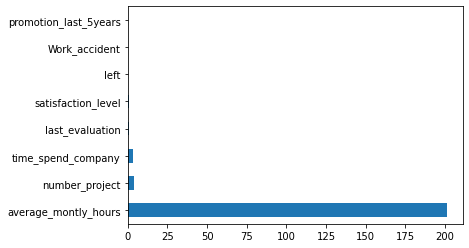

In [47]:
#lets see these missing percentages in graph
missing_percentages.plot(kind='barh')

In [50]:
#lets remove zeros values
df[df!=0]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,NaN,1.0,NaN
1,0.80,0.86,5,262,6,NaN,1.0,NaN
2,0.11,0.88,7,272,4,NaN,1.0,NaN
3,0.72,0.87,5,223,5,NaN,1.0,NaN
4,0.37,0.52,2,159,3,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,NaN,1.0,NaN
14995,0.37,0.48,2,160,3,NaN,1.0,NaN
14996,0.37,0.53,2,143,3,NaN,1.0,NaN
14997,0.11,0.96,6,280,4,NaN,1.0,NaN


<AxesSubplot:>

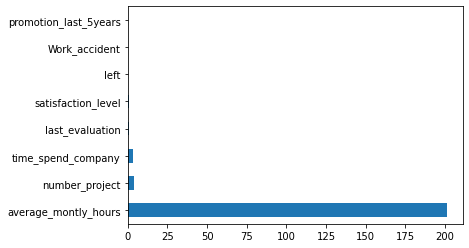

In [55]:
missing_percentages[missing_percentages !=0].plot(kind='barh')

In [76]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

###columns we will analyze 
+ number_project
+ work_accident
+ left
+ promotion_last_5_years

In [62]:
df.number_project

0        2
1        5
2        7
3        5
4        2
        ..
14994    2
14995    2
14996    2
14997    6
14998    2
Name: number_project, Length: 14999, dtype: int64

In [66]:
df.number_project.unique()

array([2, 5, 7, 6, 4, 3])

In [68]:
len('number_project') #unique number of projects

14

In [70]:
number_project = df.number_project.value_counts()
number_project

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

<AxesSubplot:>

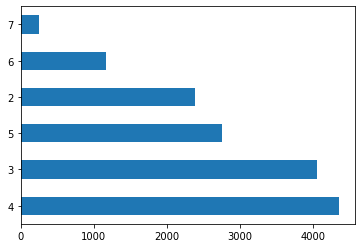

In [72]:
number_project.plot(kind='barh')

<AxesSubplot:xlabel='left', ylabel='promotion_last_5years'>

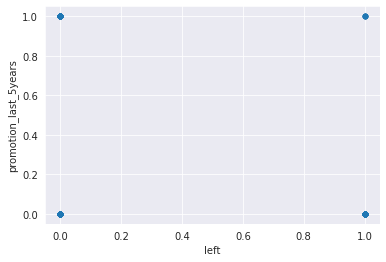

In [97]:
df.plot.scatter(x="left", y="promotion_last_5years", alpha=0.5)


<AxesSubplot:ylabel='promotion_last_5years'>

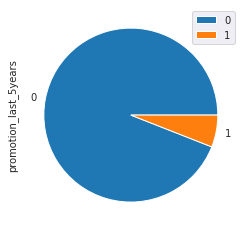

In [100]:
df.groupby(['left']).sum().plot(kind='pie', y='promotion_last_5years')


<AxesSubplot:ylabel='promotion_last_5years'>

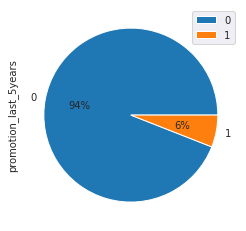

In [102]:
df.groupby(['left']).sum().plot(
    kind='pie', y='promotion_last_5years', autopct='%1.0f%%')

<AxesSubplot:ylabel='satisfaction_level'>

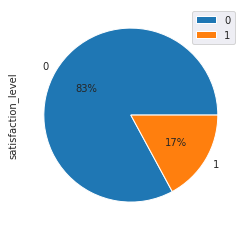

In [108]:
df.groupby(['left']).sum().plot(
    kind='pie', y='satisfaction_level', autopct='%1.0f%%')

In [111]:
df.satisfaction_level

0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction_level, Length: 14999, dtype: float64

In [113]:
maxvalue_satisfaction=df.satisfaction_level.max()

In [114]:
maxvalue_satisfaction

1.0

In [117]:
df.satisfaction_level.value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

In [119]:
df.satisfaction_level.unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [121]:
from sklearn.model_selection import train_test_split

In [154]:
x_train,x_test,y_train,y_test = train_test_split(df[['satisfaction_level']],df.left,test_size=0.25)

In [155]:
x_train

,satisfaction_level
13374,0.77
9398,0.92
9056,0.74
3094,0.74
11133,0.62
...,...
6588,0.47
7723,1.00
12399,0.10
2463,0.79


In [156]:
x_test

,satisfaction_level
813,0.15
7023,0.52
7263,0.72
3805,0.68
9457,0.75
...,...
11668,0.62
9910,0.96
3271,0.55
7296,0.53


In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
model = LogisticRegression()

In [159]:
model.fit(x_train,y_train)

LogisticRegression()

In [160]:
x_test

,satisfaction_level
813,0.15
7023,0.52
7263,0.72
3805,0.68
9457,0.75
...,...
11668,0.62
9910,0.96
3271,0.55
7296,0.53


In [161]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 1])

In [162]:
model.predict_proba(x_test)

array([[0.40044968, 0.59955032],
       [0.73168926, 0.26831074],
       [0.85366541, 0.14633459],
       ...,
       [0.75348294, 0.24651706],
       [0.73908762, 0.26091238],
       [0.35578631, 0.64421369]])

In [165]:
model.score(x_test,y_test)

0.772

### Conclusion: our model show 77% score which is good enough for a model 